In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

# Load data and Catagorize holiday

In [442]:
train_data=pd.read_csv(r"C:\Users\Admin.DESKTOP-M4R2VLU\wek4\data\train.csv",
    dtype={'StateHoliday': 'object'},
    low_memory=False
)
test_data=pd.read_csv(r"C:\Users\Admin.DESKTOP-M4R2VLU\wek4\data\test.csv")
# Convert the Date column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Convert StateHoliday to categorical type
train_data['StateHoliday'] = train_data['StateHoliday'].astype('category')

# Optionally, create a binary column for holidays
train_data['IsHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})

# Check the updated data types and unique values in StateHoliday
print(train_data.dtypes)
print(train_data['StateHoliday'].unique())

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday           category
SchoolHoliday             int64
IsHoliday              category
dtype: object
['0', 'a', 'b', 'c']
Categories (4, object): ['0', 'a', 'b', 'c']


C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\295656111.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['IsHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})
C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\295656111.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train_data['IsHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})


# Check for distribution in both training and test data

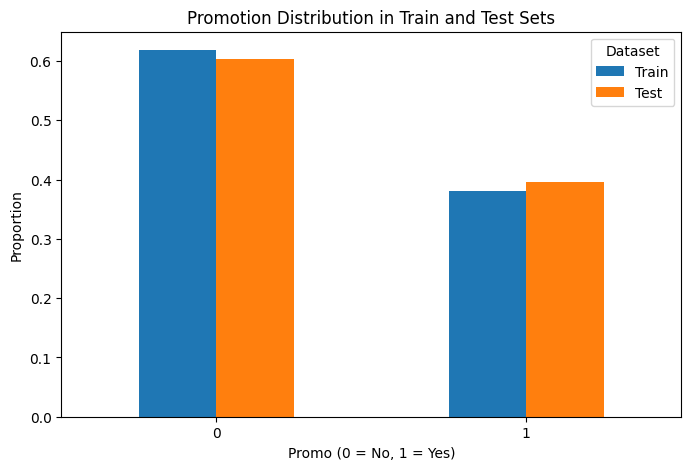

In [443]:


# Count promotions in training data
train_promo_counts = train_data['Promo'].value_counts(normalize=True)

# Count promotions in test data
test_promo_counts = test_data['Promo'].value_counts(normalize=True)

# Create a DataFrame for easier plotting
promo_distribution = pd.DataFrame({
    'Train': train_promo_counts,
    'Test': test_promo_counts
}).fillna(0)

# Plot the distribution
promo_distribution.plot(kind='bar', figsize=(8, 5))
plt.title('Promotion Distribution in Train and Test Sets')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.show()


# Check & compare sales behavior before, during, and after holidays

Text(0.5, 0, 'Holiday Status')

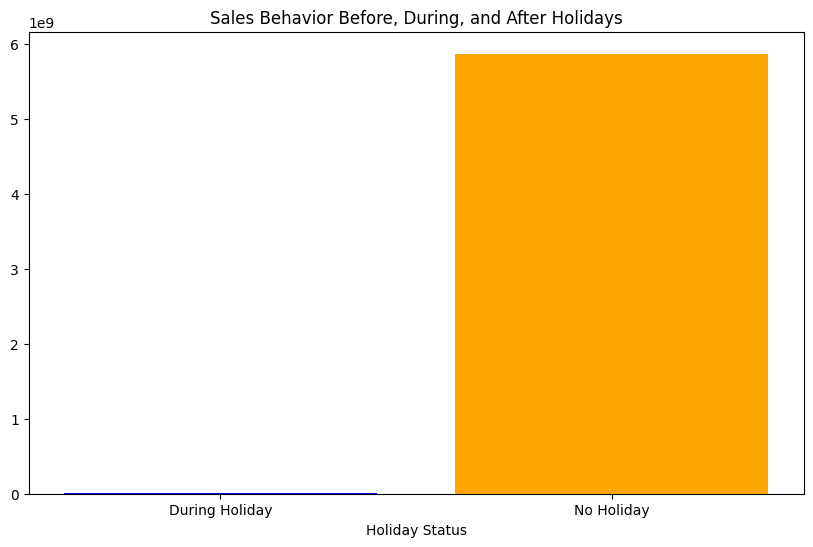

In [444]:
# Convert the Date column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Convert StateHoliday to categorical
train_data['StateHoliday'] = train_data['StateHoliday'].astype('category')

# Create a new column for holiday-related sales categorization
def categorize_sales(row):
    if row['StateHoliday'] == '0':
        return 'No Holiday'
    elif row['StateHoliday'] in ['a', 'b', 'c']:
        return 'During Holiday'
    return 'Unknown'

train_data['HolidayStatus'] = train_data.apply(categorize_sales, axis=1)

# Create columns for before and after holidays
train_data['BeforeHoliday'] = train_data['HolidayStatus'].shift(1) == 'During Holiday'
train_data['AfterHoliday'] = train_data['HolidayStatus'].shift(-1) == 'During Holiday'

# Aggregate sales
sales_summary = train_data.groupby('HolidayStatus')['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(sales_summary['HolidayStatus'], sales_summary['Sales'], color=['blue', 'orange', 'grey'])
plt.title('Sales Behavior Before, During, and After Holidays')
plt.xlabel('Holiday Status')

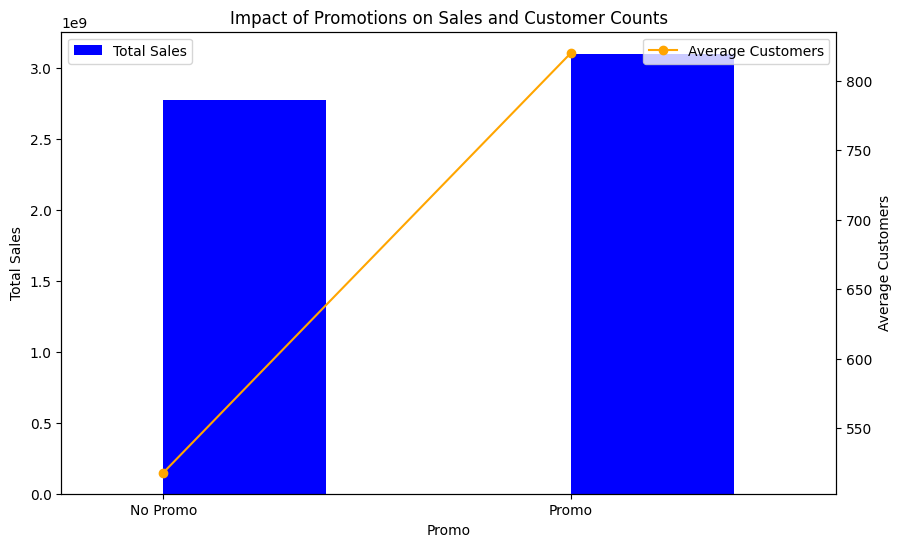

In [445]:

# Convert the Date column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Aggregate sales and customer counts based on promotions
promo_analysis = train_data.groupby('Promo').agg(
    TotalSales=('Sales', 'sum'),
    TotalCustomers=('Customers', 'sum')
).reset_index()

# Calculate average sales and customers
promo_analysis['AverageSales'] = promo_analysis['TotalSales'] / train_data['Promo'].value_counts()
promo_analysis['AverageCustomers'] = promo_analysis['TotalCustomers'] / train_data['Promo'].value_counts()

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Total Sales
promo_analysis.plot(x='Promo', y='TotalSales', kind='bar', ax=ax1, color='blue', position=0, width=0.4, label='Total Sales')
# Line plot for Average Customers
ax2 = ax1.twinx()
promo_analysis.plot(x='Promo', y='AverageCustomers', kind='line', ax=ax2, color='orange', marker='o', label='Average Customers')

# Labels and title
ax1.set_ylabel('Total Sales')
ax2.set_ylabel('Average Customers')
plt.title('Impact of Promotions on Sales and Customer Counts')
ax1.set_xticklabels(['No Promo', 'Promo'], rotation=0)
plt.show()

# Effective ways stores should promos be deployed

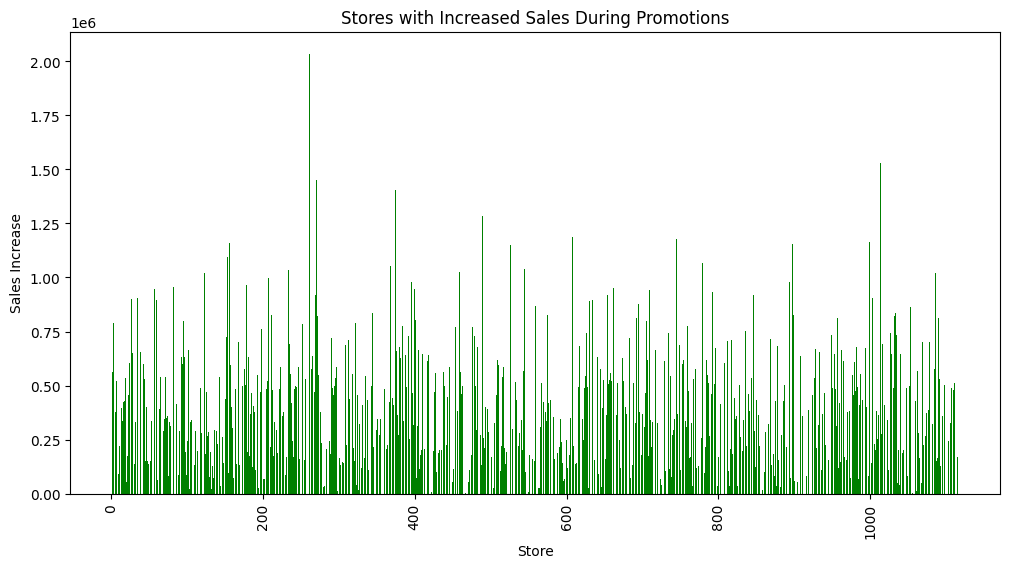

In [446]:
# Convert the Date column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Analyze promotions by store
store_promo_analysis = train_data.groupby(['Store', 'Promo']).agg(
    TotalSales=('Sales', 'sum'),
    TotalCustomers=('Customers', 'sum')
).reset_index()

# Pivoting the data for better comparison
store_promo_pivot = store_promo_analysis.pivot(index='Store', columns='Promo', values=['TotalSales', 'TotalCustomers'])
store_promo_pivot.columns = ['_'.join(map(str, col)).strip() for col in store_promo_pivot.columns]

# Calculate effectiveness
store_promo_pivot['SalesIncrease'] = store_promo_pivot['TotalSales_1'] - store_promo_pivot['TotalSales_0']
store_promo_pivot['CustomerIncrease'] = store_promo_pivot['TotalCustomers_1'] - store_promo_pivot['TotalCustomers_0']

# Filter stores with positive sales increase during promotions
effective_stores = store_promo_pivot[store_promo_pivot['SalesIncrease'] > 0]

# Visualize the effective stores
plt.figure(figsize=(12, 6))
plt.bar(effective_stores.index, effective_stores['SalesIncrease'], color='green')
plt.title('Stores with Increased Sales During Promotions')
plt.xlabel('Store')
plt.ylabel('Sales Increase')
plt.xticks(rotation=90)
plt.show()

In [447]:
# Check data types
print(train_data.dtypes)

# Check the unique values in the Customers column
print(train_data['Customers'].unique())

# Check for open store entries
open_entries = train_data[train_data['Open'] == 1]
print(open_entries.head(10))  # Display the first 10 entries where stores are open

# Check the overall data distribution for customers
print(train_data['Customers'].describe())

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday           category
SchoolHoliday             int64
IsHoliday              category
HolidayStatus            object
BeforeHoliday              bool
AfterHoliday               bool
dtype: object
[ 555  625  821 ... 3900   36 4065]
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   
5      6          5 2015-07-31   5651        589     1      1     

   Hour  Customers
0     0  644041755


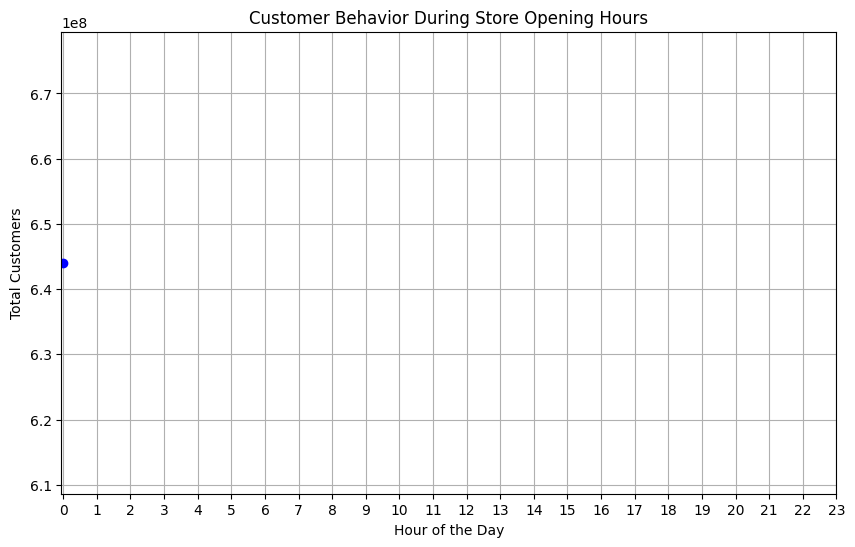

In [448]:
# Convert the Date column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Extract hour from the Date column
train_data['Hour'] = train_data['Date'].dt.hour

# Filter only the rows where the store is open
open_data = train_data[train_data['Open'] == 1]

# Aggregate customer counts by hour
hourly_customers = open_data.groupby('Hour')['Customers'].sum().reset_index()
print(hourly_customers)
# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(hourly_customers['Hour'], hourly_customers['Customers'], marker='o', color='blue')
plt.title('Customer Behavior During Store Opening Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Customers')
plt.xticks(range(0, 24))  # Show all hours
plt.grid()
plt.show()

In [449]:
# Ensure Customers is numeric
train_data['Customers'] = pd.to_numeric(train_data['Customers'], errors='coerce')

# Filter only the rows where the store is open
open_data = train_data[train_data['Open'] == 1]

# Check for hours extraction
if not open_data.empty:
    open_data['Hour'] = open_data['Date'].dt.hour

    # Aggregate customer counts by hour
    hourly_customers = open_data.groupby('Hour')['Customers'].sum().reset_index()
    print(hourly_customers)
else:
    print("No open entries found.")

   Hour  Customers
0     0  644041755


C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\3633623692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_data['Hour'] = open_data['Date'].dt.hour


#  Store opened all weekdays

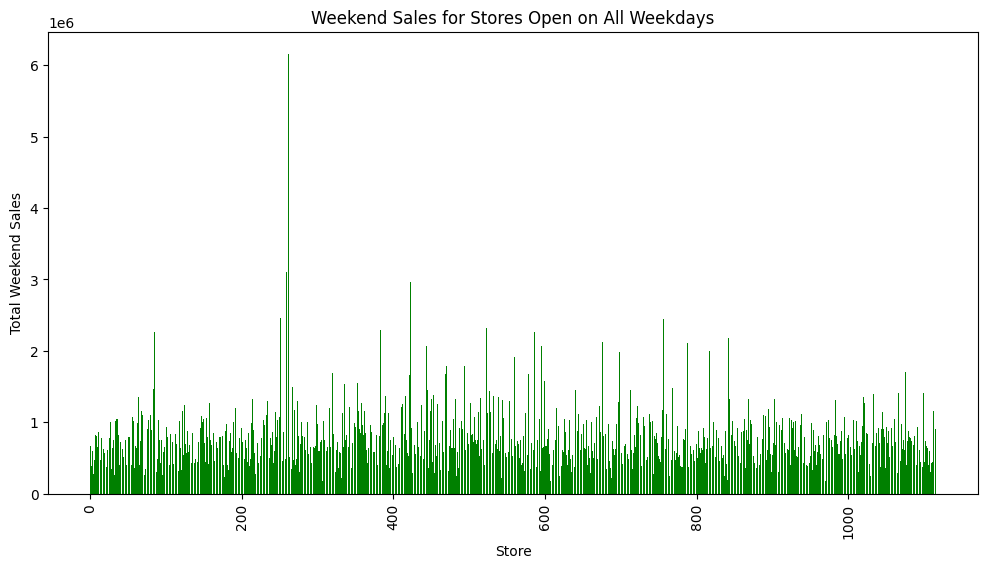

In [450]:

# Convert the Date column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Add a DayOfWeek column (0=Monday, 6=Sunday)
train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek

# Identify stores open on all weekdays (0-4)
weekdays = [0, 1, 2, 3, 4]  # Monday to Friday
open_stores_weekdays = train_data[(train_data['DayOfWeek'].isin(weekdays)) & (train_data['Open'] == 1)]

# Group by store to check if they are open all weekdays
stores_open_all_weekdays = open_stores_weekdays.groupby('Store')['DayOfWeek'].nunique()
stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays == 5].index.tolist()#

# Analyze weekend sales for these stores
weekend_sales = train_data[(train_data['DayOfWeek'].isin([5, 6])) & (train_data['Store'].isin(stores_open_all_weekdays))]

# Aggregate weekend sales
weekend_sales_summary = weekend_sales.groupby('Store')['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(weekend_sales_summary['Store'], weekend_sales_summary['Sales'], color='green')
plt.title('Weekend Sales for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Total Weekend Sales')
plt.xticks(rotation=90)
plt.show()

Check how the assortment type affects sales

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\1972465848.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\wek4\data\train.csv')


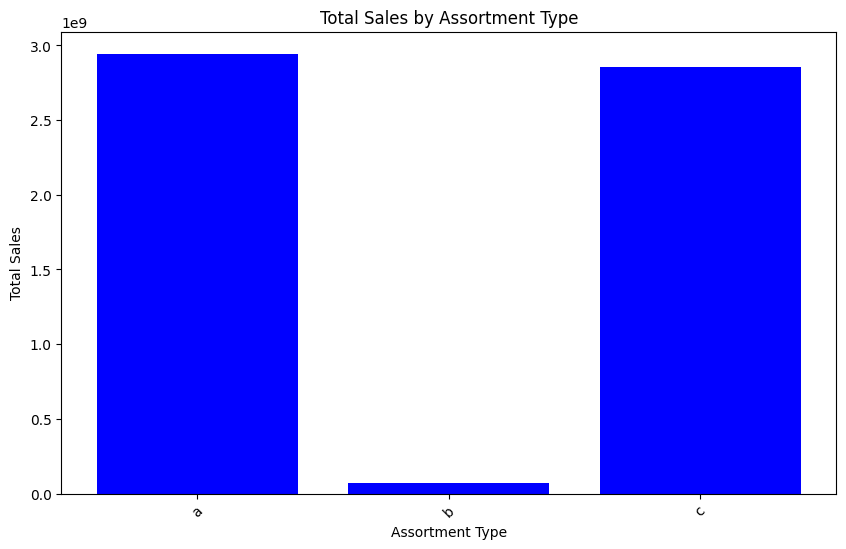

In [451]:
# Load sales data from Excel
sales_data = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\wek4\data\train.csv')

# Load store data from CSV
store_data = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\wek4\data\store.csv')

# Merge both datasets on 'Store'
merged_data = pd.merge(sales_data, store_data, on='Store')

# Aggregate sales by assortment type
assortment_sales = merged_data.groupby('Assortment')['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Sales'], color='blue')
plt.title('Total Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


The distance to the next competitor affect sales


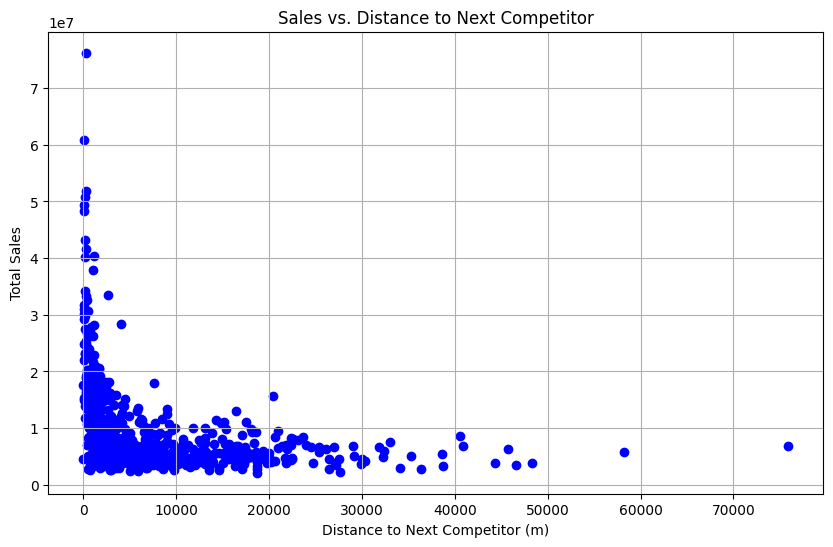

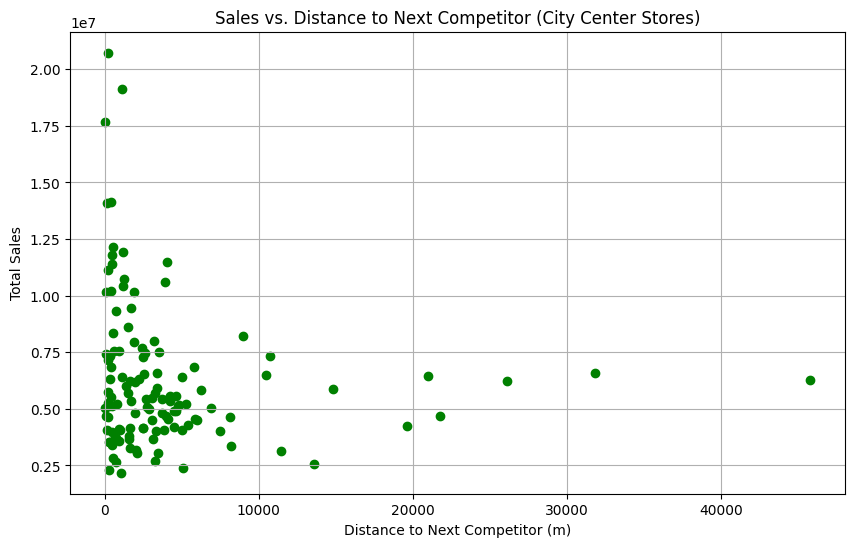

In [452]:
# Analyze sales by competition distance
distance_sales = merged_data.groupby('CompetitionDistance')['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(distance_sales['CompetitionDistance'], distance_sales['Sales'], color='blue')
plt.title('Sales vs. Distance to Next Competitor')
plt.xlabel('Distance to Next Competitor (m)')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# Segment stores in city centers (assuming StoreType 'c' indicates city center)
city_center_stores = merged_data[merged_data['StoreType'] == 'c']

# Analyze sales for city center stores by competition distance
city_center_distance_sales = city_center_stores.groupby('CompetitionDistance')['Sales'].sum().reset_index()

# Plot results for city center stores
plt.figure(figsize=(10, 6))
plt.scatter(city_center_distance_sales['CompetitionDistance'], city_center_distance_sales['Sales'], color='green')
plt.title('Sales vs. Distance to Next Competitor (City Center Stores)')
plt.xlabel('Distance to Next Competitor (m)')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

opening or reopening of new competitors affect stores

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\2348703884.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affected_stores['BeforeAfter'] = affected_stores['CompetitionDistance'].apply(lambda x: 'Before' if pd.isna(x) else 'After')


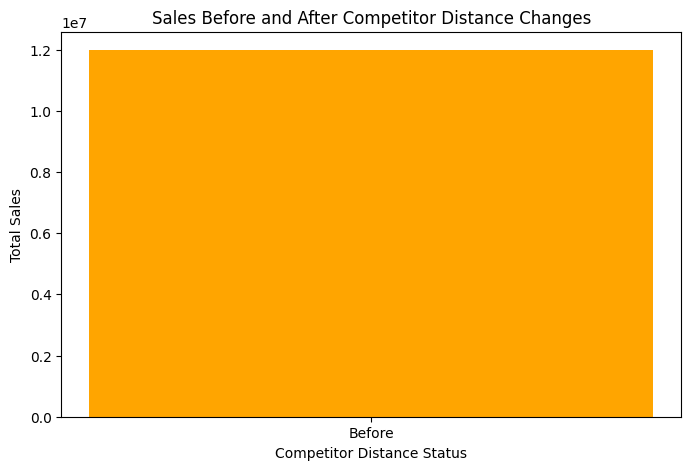

In [453]:
# Identify stores with changing competitor distances
changed_competitors = merged_data[merged_data['CompetitionDistance'].isna() & merged_data['CompetitionDistance'].shift(-1).notna()]

# Get the unique store IDs that have NA initially and valid values later
stores_with_changes = changed_competitors['Store'].unique()

# Filter the original dataset for these stores
affected_stores = merged_data[merged_data['Store'].isin(stores_with_changes)]

# Analyze sales before and after the competitor distance is filled
# Assuming 'Date' is already in datetime format
affected_stores['BeforeAfter'] = affected_stores['CompetitionDistance'].apply(lambda x: 'Before' if pd.isna(x) else 'After')

# Aggregate sales by Before/After
sales_trend = affected_stores.groupby('BeforeAfter')['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(sales_trend['BeforeAfter'], sales_trend['Sales'], color=['orange', 'blue'])
plt.title('Sales Before and After Competitor Distance Changes')
plt.xlabel('Competitor Distance Status')
plt.ylabel('Total Sales')
plt.show()

# Logging

2024-09-22 16:13:09,114 - INFO - Identifying stores with NA as competitor distance that later have values.
2024-09-22 16:13:09,125 - INFO - Found 3 stores with changing competitor distances.
2024-09-22 16:13:09,147 - INFO - Categorizing sales data based on competitor distance status.
C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\4063342412.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affected_stores['BeforeAfter'] = affected_stores['CompetitionDistance'].apply(lambda x: 'Before' if pd.isna(x) else 'After')
2024-09-22 16:13:09,164 - INFO - Aggregating sales data by competitor distance status.


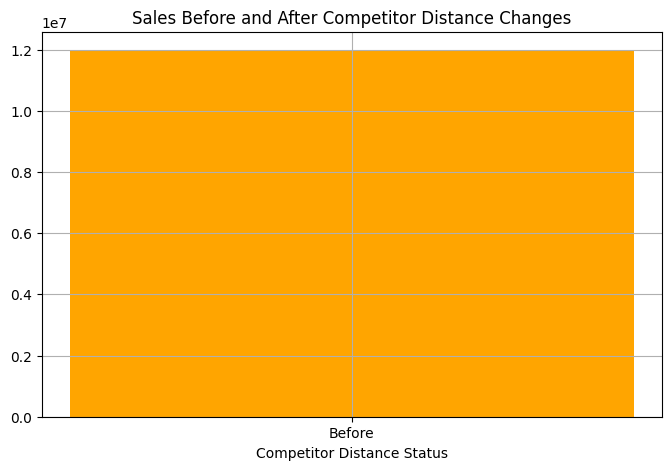

2024-09-22 16:13:09,380 - INFO - Analysis complete. The plot has been displayed.


In [454]:
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)
# Identify stores with changing competitor distances
logger.info("Identifying stores with NA as competitor distance that later have values.")
changed_competitors = merged_data[merged_data['CompetitionDistance'].isna() & merged_data['CompetitionDistance'].shift(-1).notna()]

# Get the unique store IDs that have NA initially and valid values later
stores_with_changes = changed_competitors['Store'].unique()
logger.info(f"Found {len(stores_with_changes)} stores with changing competitor distances.")



# Filter the original dataset for these stores
affected_stores = merged_data[merged_data['Store'].isin(stores_with_changes)]

# Analyze sales before and after the competitor distance is filled
logger.info("Categorizing sales data based on competitor distance status.")
affected_stores['BeforeAfter'] = affected_stores['CompetitionDistance'].apply(lambda x: 'Before' if pd.isna(x) else 'After')

# Aggregate sales by Before/After
logger.info("Aggregating sales data by competitor distance status.")
sales_trend = affected_stores.groupby('BeforeAfter')['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(sales_trend['BeforeAfter'], sales_trend['Sales'], color=['orange', 'blue'])
plt.title('Sales Before and After Competitor Distance Changes')
plt.xlabel('Competitor Distance Status')
plt.grid()
plt.show()

logger.info("Analysis complete. The plot has been displayed.")

# Prediction of store sales

In [455]:

df=merged_data

In [456]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (example: forward fill)
df.fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_20160\2048057585.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


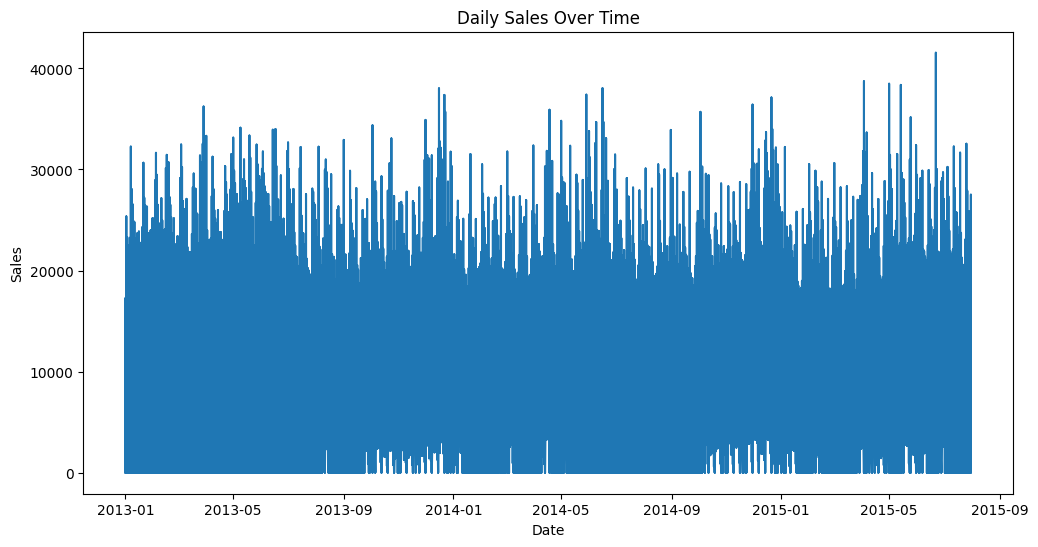

2024-09-22 16:13:13,048 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-22 16:13:13,672 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


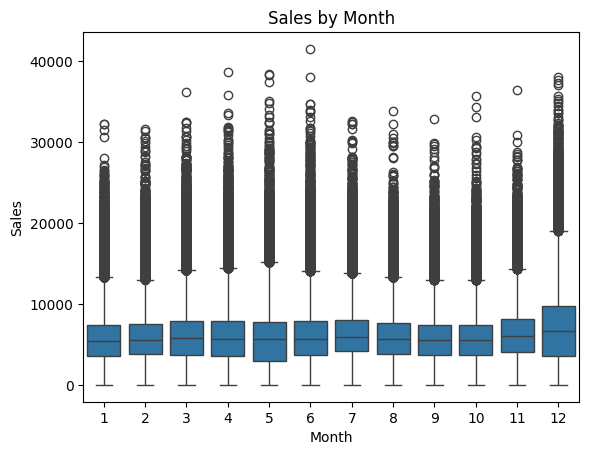

In [457]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Lagged features
df['Lagged_Sales'] = df['Sales'].shift(1)
df['Moving_Average'] = df['Sales'].rolling(window=7).mean()
# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Analyze seasonality
sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Sales by Month')
plt.show()

In [458]:
df=merged_data

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare data for modeling
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'Lagged_Sales', 'Moving_Average']
X = df[features].dropna()
y = df['Sales'][X.index]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [460]:
# Sample a smaller dataset for quicker training (optional)
sample_data = df.sample(frac=0.1, random_state=42)

# Prepare features and target
X = sample_data[features].dropna()
y = sample_data['Sales'][X.index]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with adjustments
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)  # Use all cores
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)